## Week2. Optimization problems & Rydberg atom arrays - Task 1

-----

We here use several annealing schedules here to find a solution to the UD-MIS problem and check which annealing schedule is faster.

Starting from the imports:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from Week2_Rydberg_Atoms.draw_graph import draw_graph
from Week2_Rydberg_Atoms.utils import sanity_check
from abstract_udmis import AbstractUDMIS

%matplotlib inline

Below is the code to solve the UD-MIS problem given in the Task 1.

In [20]:
class UDMIS(AbstractUDMIS):
    def __init__(self, u, graph):
        super().__init__()
        self.u, self.graph = u, graph
        self.num_vertices = len(self.graph)
        print(self.num_vertices)
        # initialize system at infinite temperature
        # i.e. vertices are completely random and uncorrelated
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()
    
    def find_edges(self):
        #num_pairs = int(self.num_vertices*(self.num_vertices)*0.5)
        edges = np.zeros((self.num_vertices, self.num_vertices), dtype=bool)
        
        for i in range(self.num_vertices-1):
            x_i, y_i = graph[i] # these are the x, y coordinates of the i'th vertex in the graph
            for j in range(i+1, self.num_vertices):
                x_j, y_j = graph[j] # these are the x, y coordinates of the j'th vertex in the graph
                
                # calculate the distance between vertices
                dij = np.sqrt((x_i - x_j)**2. + (y_i - y_j)**2.)
                if dij <= 1.0:
                    edges[i,j] = True
                    edges[j,i] = True
                    
        return edges
        
    def energy(self):
        """Returns the energy of the current spin configuration"""
        # interaction term
        interaction_term = 0
        vertex_term = 0
        for i in range(self.num_vertices-1):
            for j in range(i+1, self.num_vertices):
                
                # check if there is an edge
                if self.edges[i,j]:
                    interaction_term += self.occupations[i]*self.occupations[j]
                
            vertex_term += self.occupations[i]
        
        # missed the last vertex
        vertex_term += self.occupations[self.num_vertices-1]
    
        return u*interaction_term - vertex_term

    def energy_diff(self, i):
        connections = np.where(self.edges[i,:])[0]
        num_adjacent_occupied = sum(self.occupations[connections])
        
        if self.occupations[i] == 1:
            # flipping an occupied vertex increases the vertex term, decreases the interaction term
            vertex_term_change = 1.
            interaction_term_change = -u*num_adjacent_occupied
        
        elif self.occupations[i] == 0:
            # flipping an unoccupied vertex decreases the vertex term, increases the interaction term
            vertex_term_change = -1.
            interaction_term_change = u*num_adjacent_occupied 

        return interaction_term_change + vertex_term_change
    
    def rand_vertex(self):
        """Selects a site in the graph at random"""
        return np.random.randint(self.num_vertices)        

The graph to be dealt with in Task 1 is as follows.

In [21]:
u = 1.35
graph = [(0.3461717838632017, 1.4984640297338632),
        (0.6316400411846113, 2.5754677320579895),
        (1.3906262250927481, 2.164978861396621),
        (0.66436005100802, 0.6717919819739032),
        (0.8663329771713457, 3.3876341010035995),
        (1.1643107343501296, 1.0823066243402013)
       ]

udmis = UDMIS(u, graph)

6


Let $t_i=100$ and $t_f=0.01$. Define

$$T=t_i*\left(\frac{t_f}{t_i}\right)^{x^p},$$

where $0 \le x \le 1$ and $p$ is nonnegative real number.

If p=1, $T$ is the given annealing schedule.



In [41]:
def Task1_graph(N, val):
    t = np.arange(N+1)
    T_i = 100
    T_f = 0.01
    T = T_i * ((T_f/T_i) ** ((t/N) ** val))
    y1 = list(range(int(N/10)+1))
    S = list(range(int(N/10)+1))

    for t in range(N+1):
        temp = T[t]
        E = udmis.mc_step(T=temp)

        if t % 10 == 0:
            # print(t, E, udmis.occupations)
            num_violated, num_vertices = sanity_check(graph, answer=udmis.occupations, radius=0.5)
            k = int(t/10)
            y1[k] = E
            if num_violated != 0 or num_vertices != 3:
                S[k] = 0
            else:
                S[k] = 1

        if t == N:
            UO = udmis.occupations

    x1 = range(int(N/10)+1)
    plt.plot(x1, y1, 'r')
    plt.scatter(x1, S, s=1, c='b')
    plt.show()

    g = draw_graph(coordinates=graph,
                   radius=0.5,
                   answer=UO)

We take step size 1000 and investigate the case where $p = 16, 4, 1, \frac{1}{4}, \frac{1}{16}, \frac{1}{64}$.

In the graphs below, the red line indicates the change in energy for the step,
and the blue dots indicate whether the output value is a solution.
If the blue dot is 1, the output is a solution to the given problem.


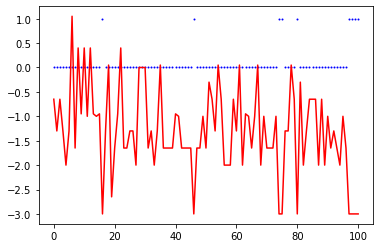

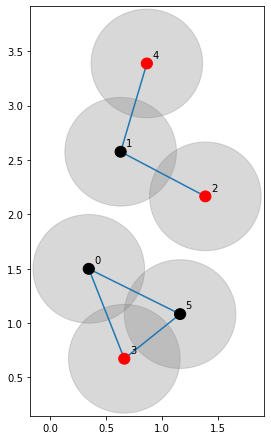

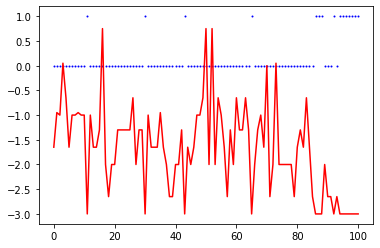

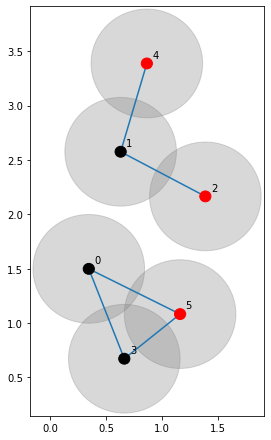

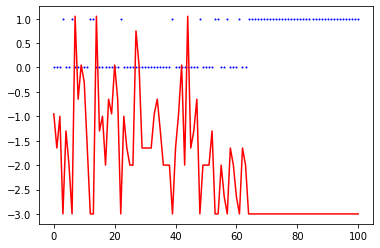

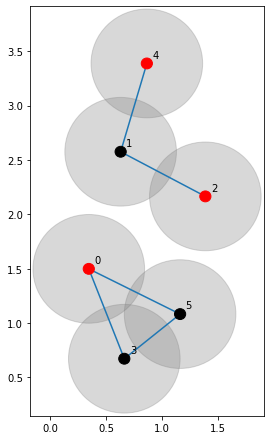

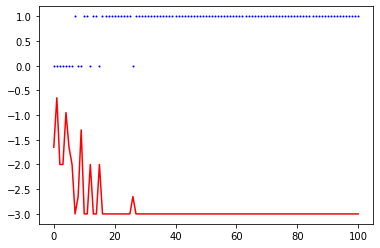

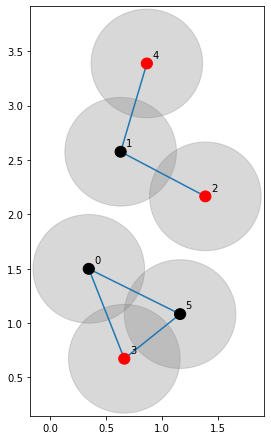

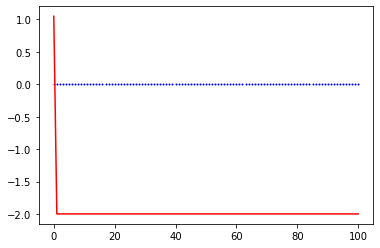

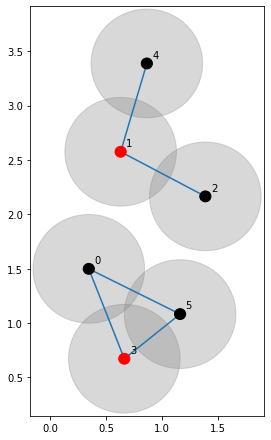

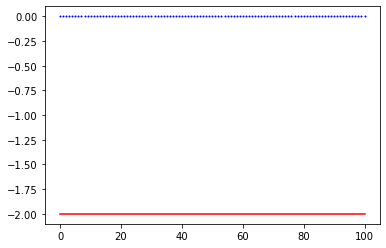

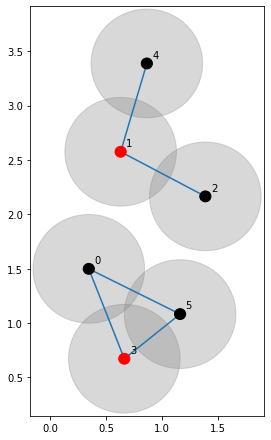

In [79]:
Task1_graph(1000, 16)
Task1_graph(1000, 4)
Task1_graph(1000, 1)
Task1_graph(1000, 1/4)
Task1_graph(1000, 1/16)
Task1_graph(1000, 1/64)

It can be inferred from the above results that as $p$ gets smaller,
the number of steps leading to the final result decreases,
but if it becomes smaller than a certain level, the result may not be a solution to the given problem.

Below is the graph showing the change in temperature $T$ with respect to $p$.


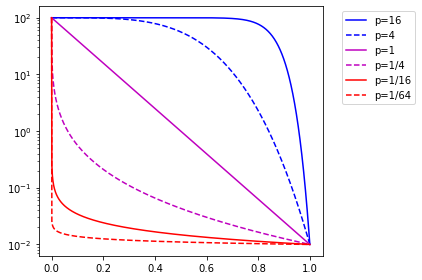

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T_i = 100
T_f = 0.01
x = np.linspace(0, 1, 1000)
T1 = T_i * ((T_f/T_i) ** (x**16))
T2 = T_i * ((T_f/T_i) ** (x**4))
T3 = T_i * ((T_f/T_i) ** x)
T4 = T_i * ((T_f/T_i) ** (x**(1/4)))
T5 = T_i * ((T_f/T_i) ** (x**(1/16)))
T6 = T_i * ((T_f/T_i) ** (x**(1/64)))



plt.plot(x, T1, 'b-', label="p=16")
plt.plot(x, T2, 'b--', label="p=4")
plt.plot(x, T3, 'm-', label="p=1")
plt.plot(x, T4, 'm--', label="p=1/4")
plt.plot(x, T5, 'r-', label="p=1/16")
plt.plot(x, T6, 'r--', label="p=1/64")


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', numpoints = 1)
plt.yscale("log")
plt.tight_layout()
plt.show()
